### OBJECTIVE

The objective of this project is to develop a machinelearning model and deploy it as a user-friendly web application that predicts the resale prices of flats in Singapore. This predictive model will be based on historical data of resale flat transactions, and it aims to assist both potential buyers and sellers in estimating the resalevalue of a flat.

# Cleaning the data and training the model

### Getting started

In [92]:
# Importing the requried libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

### Reading data

In [4]:
# Reading the csv data as dataframes
df1=pd.read_csv(r'C:\Users\MAarif\Documents\Guvi\Task\Singapore_Flat_ResalePrices_Predicting-main\dataset\ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2=pd.read_csv(r'C:\Users\MAarif\Documents\Guvi\Task\Singapore_Flat_ResalePrices_Predicting-main\dataset\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3=pd.read_csv(r'C:\Users\MAarif\Documents\Guvi\Task\Singapore_Flat_ResalePrices_Predicting-main\dataset\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df4=pd.read_csv(r'C:\Users\MAarif\Documents\Guvi\Task\Singapore_Flat_ResalePrices_Predicting-main\dataset\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df5=pd.read_csv(r'C:\Users\MAarif\Documents\Guvi\Task\Singapore_Flat_ResalePrices_Predicting-main\dataset\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [5]:
# Shape of each dataframes
dfs=[df1,df2,df3,df4,df5]
for i in dfs:
    print(i.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(169860, 11)


In [6]:
# Concating all dataframes to a single dataframe
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

### Understanding the data and cleaning

In [7]:
# Displaying the data
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [8]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
916058,2024-01,YISHUN,5 ROOM,229,YISHUN ST 21,07 TO 09,121.0,Improved,1985,610088.0,60 years 06 months
916059,2024-01,YISHUN,5 ROOM,505C,YISHUN ST 51,04 TO 06,112.0,Improved,2016,640000.0,91 years 03 months
916060,2024-01,YISHUN,5 ROOM,513C,YISHUN ST 51,07 TO 09,113.0,Improved,2018,675000.0,93 years 03 months
916061,2024-01,YISHUN,5 ROOM,602,YISHUN ST 61,07 TO 09,121.0,Improved,1987,688000.0,62 years 05 months
916062,2024-01,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 08 months


In [9]:
# Shape of the data
df.shape

(916063, 11)

In [10]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916063 entries, 0 to 916062
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                916063 non-null  object 
 1   town                 916063 non-null  object 
 2   flat_type            916063 non-null  object 
 3   block                916063 non-null  object 
 4   street_name          916063 non-null  object 
 5   storey_range         916063 non-null  object 
 6   floor_area_sqm       916063 non-null  float64
 7   flat_model           916063 non-null  object 
 8   lease_commence_date  916063 non-null  int64  
 9   resale_price         916063 non-null  float64
 10  remaining_lease      207013 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ MB


In [11]:
# Unique values in each column
for col in df.columns[0:]:
    print(col, ': ', (df[col].nunique()), 'labels')

month :  409 labels
town :  27 labels
flat_type :  8 labels
block :  2700 labels
street_name :  584 labels
storey_range :  25 labels
floor_area_sqm :  210 labels
flat_model :  34 labels
lease_commence_date :  56 labels
resale_price :  9359 labels
remaining_lease :  720 labels


In [12]:
# Null values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

Droping the 'remaining_lease' column as majority of the rows lacks this value(data is available only from 2015)

In [13]:
# Droping the column as mojority of the data is null
df = df.drop(columns='remaining_lease')

In [14]:
# After droping the column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

C:\Users\MAarif\AppData\Local\Temp\ipykernel_22604\3192126979.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['resale_price'], bins = 20)


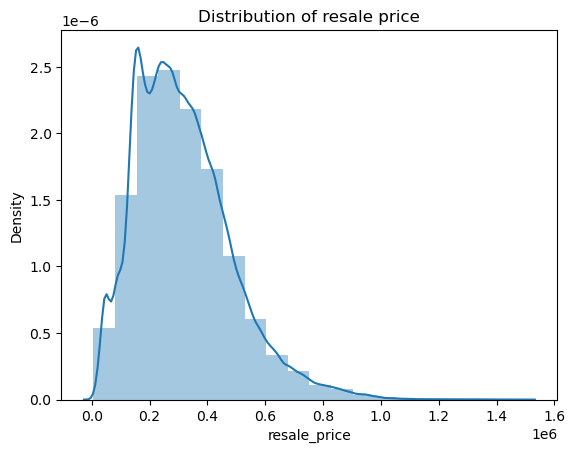

In [15]:
# Visualize the distribution of the resale price column
sns.distplot(df['resale_price'], bins = 20)
plt.title('Distribution of resale price')
plt.show()

### Dealing with Features

#### flat_type column
Collapsing flat type categories

In [16]:
df['flat_type'].value_counts()

4 ROOM              347596
3 ROOM              293255
5 ROOM              192880
EXECUTIVE            68977
2 ROOM               11516
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       260
Name: flat_type, dtype: int64

In [17]:
# Unique lables in flat_type column
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [18]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

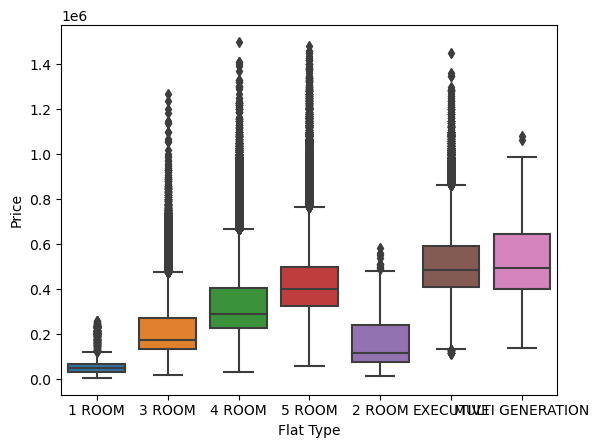

In [19]:
# Visualize relationship between price and flat_type
sns.boxplot(x = df['flat_type'], y = df['resale_price'])
plt.xlabel('Flat Type')
plt.ylabel('Price')
plt.show()

Encoding the flat type categories

In [20]:
# Assigning the value-pairs to be replaced
cat = {'1 ROOM': 1,
       '2 ROOM':2,
       '3 ROOM':3,
       '4 ROOM':4,
       '5 ROOM':5,
       'EXECUTIVE':6,
       'MULTI GENERATION':7}

# Replacing the values in df
df['flat_type'] = df['flat_type'].replace(cat)
df['flat_type'].value_counts()

4    347596
3    293255
5    192880
6     68977
2     11516
1      1300
7       539
Name: flat_type, dtype: int64

Dealing with collapsed flat model categories

#### flat_model column

In [21]:
# Flat_model column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [22]:
# Deal with capitalized value
df['flat_model'] = df['flat_model'].str.lower()

In [23]:
# Number of unique lables in flat model after dealing with capitalized values
df['flat_model'].nunique()

21

In [24]:
# Altered flat_model column
df['flat_model'].value_counts()

model a                   260695
improved                  239194
new generation            187694
simplified                 57160
premium apartment          45675
standard                   42291
apartment                  35137
maisonette                 29388
model a2                   10017
dbss                        3197
model a-maisonette          2061
adjoined flat               1234
terrace                      688
multi generation             539
type s1                      430
type s2                      212
improved-maisonette          125
2-room                       109
premium apartment loft       105
premium maisonette            86
3gen                          26
Name: flat_model, dtype: int64

In [25]:
# Encoding flat_model column
le = preprocessing.LabelEncoder()

flat_modelcode= le.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)

In [26]:
df['flat_modelcode'].value_counts()

8     260695
5     239194
12    187694
16     57160
13     45675
17     42291
3      35137
7      29388
10     10017
4       3197
9       2061
2       1234
18       688
11       539
19       430
20       212
6        125
0        109
14       105
15        86
1         26
Name: flat_modelcode, dtype: int64

#### Other features preparation

In [27]:
# Town column 
df['town'].nunique()

27

In [28]:
df['town'].value_counts()

TAMPINES           79185
YISHUN             69309
BEDOK              66116
JURONG WEST        65879
WOODLANDS          64736
ANG MO KIO         51682
HOUGANG            50113
BUKIT BATOK        43712
CHOA CHU KANG      37798
BUKIT MERAH        33942
PASIR RIS          32945
SENGKANG           31677
TOA PAYOH          31237
QUEENSTOWN         28505
GEYLANG            27949
CLEMENTI           27816
BUKIT PANJANG      27366
KALLANG/WHAMPOA    26843
JURONG EAST        24553
SERANGOON          22645
BISHAN             21128
PUNGGOL            19851
SEMBAWANG          13458
MARINE PARADE       7989
CENTRAL AREA        7075
BUKIT TIMAH         2490
LIM CHU KANG          64
Name: town, dtype: int64

In [29]:
# Creating a column with encoded value
town_code = le.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town_code)

In [30]:
# Encoded value count
df['town_code'].value_counts()

23    79185
26    69309
1     66116
13    65879
25    64736
0     51682
11    50113
3     43712
8     37798
4     33942
17    32945
21    31677
24    31237
19    28505
10    27949
9     27816
5     27366
14    26843
12    24553
22    22645
2     21128
18    19851
20    13458
16     7989
7      7075
6      2490
15       64
Name: town_code, dtype: int64

#### Dividing the columns

In [31]:
# Print header of column
df['storey_range'].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [32]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [33]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])

In [34]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [35]:
# Splitting month column
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [36]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])

In [37]:
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [38]:
df.head()

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


In [40]:
df.to_csv('dataset\Pricedata.csv', index=False)

#### Dealing with datatypes

In [41]:
# Datatyppe of the columns
df.dtypes

month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

In [42]:
# Changing the datatype of numeric columns
df[['selling_year','selling_month','storey_min','storey_max']] = df[['selling_year','selling_month','storey_min','storey_max']].astype('int')

In [43]:
df.dtypes

month                   object
selling_year             int32
selling_month            int32
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min               int32
storey_max               int32
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

<Axes: >

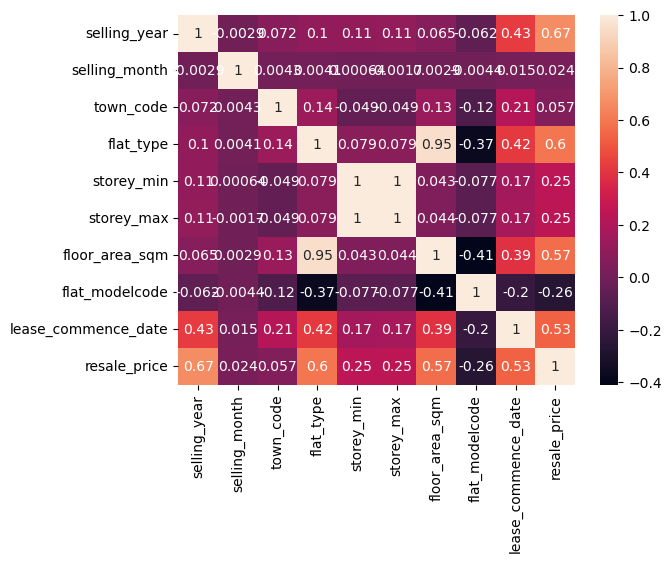

In [54]:
# Correlation for the feature
corr_df = df[['selling_year','selling_month','town_code','flat_type','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df, annot = True)

### Training the model

In [58]:
# Assigning the data
X = df[['selling_year','selling_month','town_code','flat_type','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date']]
y = df['resale_price']

In [115]:
X

,selling_year,selling_month,town_code,flat_type,storey_min,storey_max,floor_area_sqm,flat_modelcode,lease_commence_date
0,1990,1,0,1,10,12,31.0,5,1977
1,1990,1,0,1,4,6,31.0,5,1977
2,1990,1,0,1,10,12,31.0,5,1977
3,1990,1,0,1,7,9,31.0,5,1977
4,1990,1,0,3,4,6,73.0,12,1976
...,...,...,...,...,...,...,...,...,...
916058,2024,1,26,5,7,9,121.0,5,1985
916059,2024,1,26,5,4,6,112.0,5,2016
916060,2024,1,26,5,7,9,113.0,5,2018
916061,2024,1,26,5,7,9,121.0,5,1987


In [59]:
# Splitting the data
# Importing the split
from sklearn.model_selection import train_test_split

# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### Linear Regression

In [60]:
# Create a regressor
from sklearn.linear_model import LinearRegression

# Create a regressor object
lin_reg = LinearRegression()

# fit the model with X-train and y_train data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [61]:
# Accuracy score of the model
score = lin_reg.score(X_test,y_test)
print(score * 100,"%")

76.00041952915385 %


#### Decision Tree Regressor

In [62]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
Dt_reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the model with X-train and y_train data 
Dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [63]:
# Accuracy of the model
score = Dt_reg.score(X_test,y_test)
print(score * 100,"%")

96.00805608381626 %


#### Random Forest Regressor

In [64]:
# Create a regressor
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [65]:
# Accuracy of the model
score = rf_reg.score(X_test,y_test)
print(score * 100,"%")

97.67623299640185 %


Pickling the random forest trained knowledge to build streamlit ML model web page

In [66]:
# Pickling the trained model
# Importing the pickle package
import pickle

with open("resale_rfr.pkl","wb") as files:
  pickle.dump(rf_reg, files)

In [69]:
with open('resale_rfr.pkl', 'rb') as file:
    loaded_model = pickle.load(file)



In [119]:
sample_data = ([[2019,12,0,1,10,12,115,5,2000]])
prediction = loaded_model.predict(sample_data)

# Display the prediction
print("Prediction:", prediction)

Prediction: [651660.21333333]


In [118]:
sample_data1 = ([[2019,1,1,2,10,12,'115.0',2,2000]])
predict = rf_reg.predict(sample_data1)

# Display the prediction
print("Prediction:", predict)

Prediction: [615386.09333333]


In [117]:
sample_data1 = ([[2024,1,26,6,4,6,146.0,5,1988]])
dtpredict = Dt_reg.predict(sample_data1)

# Display the prediction
print("Prediction:", dtpredict)

Prediction: [750000.]
